<ipython-input-2-6a876dc06223>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sejong_dong_apt = df_sejong_dong[df_sejong_dong['property_type'] == 'apartment'].groupby(['읍면동']).mean().drop(columns='평수', axis=1)


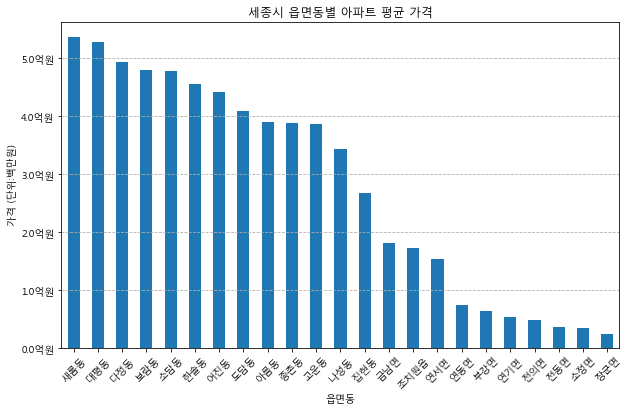

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df1 = pd.read_csv('./complex_20230308.csv', header=None)
df1.columns = ['old_addr_idx', 'complex_name', 'property_type','시도','시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']

df_sejong = df1.loc[df1['시도']=='세종특별자치시']

df2 = pd.read_csv('./property_20230308.csv', header=None)
df2.columns = ['pk','old_addr_idx','dong','ho','official_price','평수','updated']

df_sejong_dong = df2.merge(df_sejong, on='old_addr_idx')

df_sejong_dong_apt = df_sejong_dong[df_sejong_dong['property_type'] == 'apartment'].groupby(['읍면동']).mean().drop(columns='평수', axis=1)

df_sejong_dong_apt= df_sejong_dong_apt.reset_index().sort_values('official_price', ascending=False)


pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df_sejong_dong_apt.plot(kind='bar', x='읍면동', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('세종시 읍면동별 아파트 평균 가격')
plt.ylabel('가격 (단위:백만원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)
graph.grid(True, axis='y', linestyle='--')

# Define a function to format the tick labels
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)

# Format the tick labels on the y-axis
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

plt.savefig('세종시 읍면동별 아파트 평균 가격', format='jpeg', dpi=300)